# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
#Loading the csv file into the dataframe:
import pandas as pd
df = pd.read_csv('data/human_body_temperature.csv')

In [2]:
#Exploring the information of the dataset:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


In [3]:
#Exploring the data of the dataset:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [4]:
#Importing required packages:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import norm
from scipy import stats
import math
%matplotlib inline

In [5]:
#Assigning the temperature column to temp:
temp= df['temperature']

### Question 1: Is the distribution of body temperatures normal?

In [6]:
temp = df.temperature.sort_values()
bin_values = np.arange(start=temp.min(), stop=temp.max(), step=0.04)
mu = temp.mean()
std= temp.std()

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Human Body Temperature Distribution')

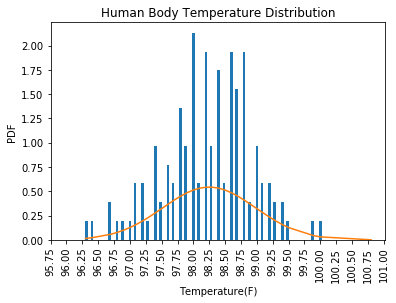

In [7]:
#Plotting the histogram and PDF:
p=norm.pdf(temp,mu,std)
plt.hist(temp,bins=bin_values,stacked=True, normed=True)
plt.plot(temp, p)
plt.xlabel('Temperature(F)')
plt.ylabel('PDF')
xticks = plt.xticks(np.arange(95.75,101.25,0.25),rotation=90)
plt.title('Human Body Temperature Distribution')

###### The above plot shows that temperature of a given dataset is almost normally distributed. 

### Question 2: Is the sample size large? Are the observations independent?

##### Yes. The sample size is large. Since, the dataset is greater than 30. Also, the observations are indepentent. 

### Question 3: Is the true population mean really 98.6 degrees F? 


In [8]:
#generating bootstrap replicate:
def bs_replicate_1d(data, func):
    #compute bootstrap sample:
    bs_sample= np.random.choice(data, size=len(data))
    return func(bs_sample)

In [9]:
#generating many bootstrap replicate:
def draw_bs_reps(data, func, size=1):
    """draw bootstrap replicates"""
    #initialize an array:
    bs_replicates=np.empty(size)
    #bootstrap replicate func using for loop:
    for i in range(size):
        bs_replicates[i]= bs_replicate_1d(data, func)
    return bs_replicates    

In [10]:
temp_replicates= draw_bs_reps(temp, np.mean, size=10000)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0,0.5,'Count')

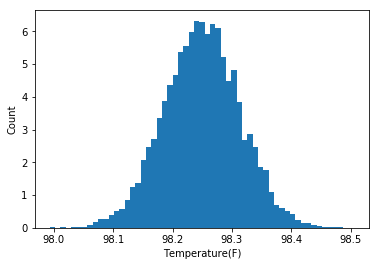

In [11]:
#Plotting histogram:
bin_values = np.arange(start=temp_replicates.min(), stop=temp_replicates.max(), step= 0.009)
plt.hist(temp_replicates, bins=bin_values, normed=True)
plt.xlabel('Temperature(F)')
plt.ylabel('Count')

In [12]:
#compute the 95% confidence interval
np.percentile(temp_replicates, [2.5,97.5])

array([98.12382692, 98.37384615])

In [13]:
#Bootstrap hypothysis test:
wunderlich_value= 98.6
temp_shifted= temp - np.mean(temp) + wunderlich_value

In [14]:
#Computing the bootstrap replicates of shifted data and p-value:
temp_replicates_shifted= draw_bs_reps(temp_shifted, np.mean, size=10000)
p_value= np.sum(temp_replicates_shifted <= np.mean([df['temperature']]))/10000
p_value

0.0

In [15]:
#T-test Statistic
t_sample= temp
stats.ttest_1samp(t_sample, 98.6)

Ttest_1sampResult(statistic=-5.454823292364077, pvalue=2.410632041561008e-07)

##### The above plot, confidence inteval, p_value, t-test statistics proves that True Mean Temperature is not 98.6 F. Also, confirms that both the original data and Wunderlich data have different measurements and fundamentals. One sample test is done since, we have one set of data with single number comparison(Wunderlich mean). Z test statistic is used since, the data is greater than 30. However, since the dataset is large T-test and Z-test gives and proves the same result.

### Question 4: Draw a small sample of size 10 from the data and repeat both frequentist tests.

In [16]:
#Computing small sample of the data:
temp_sample= np.random.choice(temp, size=10)
stats.ttest_1samp(temp_sample, 98.6)

Ttest_1sampResult(statistic=-2.4434776429549876, pvalue=0.0371520977522063)

##### Since the dataset is large T-test and Z-test gives and proves the same result.

### Question 5: At what temperature should we consider someone's temperature to be "abnormal"?

In [17]:
#compute the 95% confidence interval
np.percentile(temp_replicates, [2.5,97.5])

array([98.12382692, 98.37384615])

##### According to the above confidance interval, the average body temperature of a human body is 98.12(F) to 98.37(F). Any temperature greater than 98.4 is considered to be Abnormal.

### Question 6: Is there a significant difference between males and females in normal temperature?

In [18]:
#Computing male and female temperatures:
male_temp=df['temperature'][df['gender']=='M']
female_temp=df['temperature'][df['gender']=='F']

In [19]:
#Male temperature mean:
male_mean_temp= np.mean(male_temp)
male_mean_temp

98.1046153846154

In [20]:
#Female temperature mean:
female_mean_temp= np.mean(female_temp)
female_mean_temp

98.39384615384613

In [21]:
#Difference of means:
difference_of_means= female_mean_temp-male_mean_temp
difference_of_means

0.289230769230727

In [22]:
#computing two sample test:
temp_concat = np.concatenate((female_temp, male_temp))
temp_bs_replicates= np.empty(10000)
for i in range (10000):
    temp_perm= np.random.choice(temp_concat, size= len(temp_concat))
    temp_bs_replicates[i]= np.mean(temp_perm[:len(female_temp)]) - np.mean(temp_perm[len(female_temp):])

In [23]:
p= np.sum(temp_bs_replicates>=difference_of_means)/10000
p

0.0123

##### Based on the evidance of p-value with null hypothesis test. There is a significant difference between the Female and Male normal temperatures.

##### On the conclusion, the true body normal temperature is not 98.6F. Also, based on the above plots and evidences there is a fundamental difference between the given and the Carl Wunderlich dataset. 